<a href="https://colab.research.google.com/github/SamuelEBDS/RegressaoLinear/blob/main/Regress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressao Linear

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#warning
from yellowbrick.regressor import ResidualsPlot

In [ ]:
base = pd.read_csv('cars.csv')
base.shape

(50, 3)

In [ ]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [ ]:
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [ ]:
#Definição das variaveis x e y, distancia é a variavwel independente e y velocidade é a variavel independente
x = base.iloc[:,1].values
y = base.iloc[:,0].values
x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

In [ ]:
#calculo de matriz com uma coluna a mais
#correlação alta, forte e positiva
correlacao = np.corrcoef(x, y)
correlacao


array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [ ]:
#formato de matriz com uma coluna a mais
x = x.reshape(-1,1)
#Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [ ]:
#Visualização dos coeficientes
#inclinção vai tocar no eixo y
modelo.intercept_

8.283905641787172

In [ ]:
#inclinação, quando a velocidade cresce com o crescimento da distancia, e mostra o angulo. 
modelo.coef_

array([0.16556757])

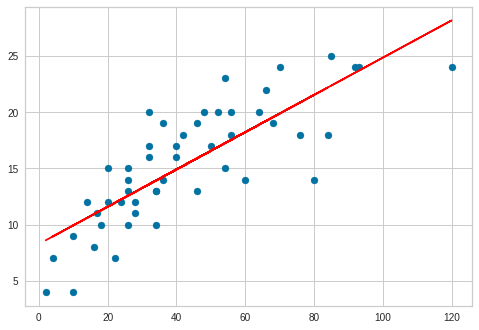

In [ ]:
#Geração do grafico com os pontos reais e as previsoes
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red') #linha de melhor ajuste para ter a correlação. 

In [ ]:
#Previsao da distancia 22 pes usando a formula manual
#interceptaçao * inclinaçao * valor de dist
#Qual velocidade se levou 22 pes para parar?
modelo.intercept_ + modelo.coef_ * 22
#se levou 22 pes para parar a velocidade dele era de 11.9256..

array([11.92639228])

In [ ]:
#Previsao utilizando funçao do sklearn 
modelo.predict([[22]])

array([11.92639228])

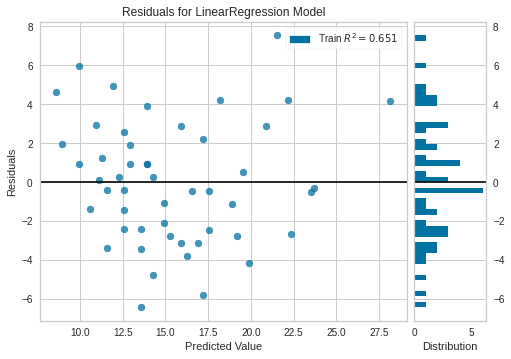

In [ ]:
#Grafico para visualizar os residuais 
visualizador = ResidualsPlot(modelo)
visualizador.fit(x,y)
visualizador.poof()

#Regressao Multipla

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [ ]:
#Carregamento da base de dados e exclusao da primeira coluna
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [ ]:
#mpeg consumo, cyl cilindros, disp cilindradas, hp 
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#exclui coluna
base = base.drop(['Unnamed: 0'], axis = 1)

In [ ]:
base.head()
#mais cilindrada menos gasta, enquanto o cilindrada aumenta o consumo é menor. 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#Criação de x e y: variavel independete e variavel dependente
#calculo da correlação entre x e y
x = base.iloc[:, 2].values #coluna disp , cilindrada
y = base. iloc[:, 0].values #coluna mpg , consumo
correlação = np.corrcoef(x, y)
correlação

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [ ]:
#Mudança do formato de x para o formato de matriz (necessario para versoes mais recentes do sklearn)
x = x.reshape(-1,1)

In [ ]:
#Criação do modelo, treinamento , visualização dos coeficientes e do score do modelo
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [ ]:
#interceptação
modelo.intercept_

29.599854756163946

In [ ]:
#inclinação 
modelo.coef_

array([-0.04121512])

In [ ]:
#score k², quanto o modelo consegue explicar os valores pela variavel explicatoria. 
modelo.score(x, y)

0.7183433404897299

In [ ]:
#Geração das previsoes
previsoes = modelo.predict(x)
previsoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

In [ ]:
#Criação do modelo, utilizando a biblioteca statsmodel
#podemos ver r ajustado r2
modelo_ajustado = sm.ols(formula = 'mpg ~ disp', data = base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           9.38e-10
Time:                        14:08:09   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

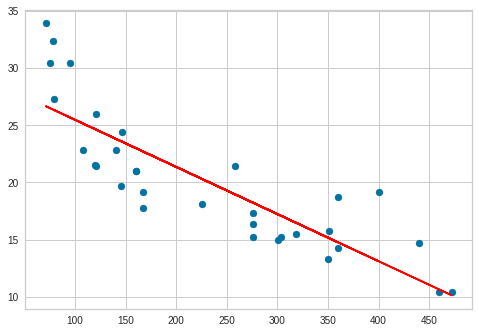

In [ ]:
#visualização dos resultados 
plt.scatter(x, y)
plt.plot(x, previsoes, color = 'red')

In [ ]:
#previsao para somente um valor
modelo.predict([[200]])

array([21.35683076])

In [ ]:
#criação de novos variaveis x1 e y1 e novo modelo para comparaçao com o anterior
# 3 variaveis dependentes para prever mpg: cyl -> disp -> hp
x1 = base.iloc[:, 1:4].values
x1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [ ]:
y1 = base.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit(x1, y1)
#R²
modelo2.score(x1,y1)

0.7678877440928638

In [ ]:
#Criaçao do modelo ajustado com mais atributos (regressao linear multipla)
#usando stats models
modelo_ajustado2 = sm.ols(formula = 'mpg ~cyl + disp + hp', data = base)
modelo_treinado2 =  modelo_ajustado2.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           9.38e-10
Time:                        14:12:28   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#previsao de um novo registro
novo = np.array([4,200,100])
novo = novo.reshape(1, -1)
modelo2.predict(novo)

array([24.03968887])

#Exercicio, Faça voce mesmo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [ ]:
base = pd.read_csv('slr12.csv', sep = ';')
base.shape

(36, 2)

In [ ]:
base.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [ ]:
#y - variavel dependente , que queremos prever. Franquia Anual
#x -  variavel independente, qe usamos para prever
x = base.iloc[:,0].values
y = base.iloc[:,1].values
x

array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
       1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
       1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
        900,  900,  850])

In [ ]:
correlacao = np.corrcoef(x, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [ ]:
#formato de matriz com uma coluna a mais
x = x.reshape(-1,1)
#Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [ ]:
#Visualização dos coeficientes
#inclinção vai tocar no eixo y
modelo.intercept_

867.6042222620559

In [ ]:
#inclinação, quando a velocidade cresce com o crescimento da distancia, e mostra o angulo. 
modelo.coef_

array([0.37315794])

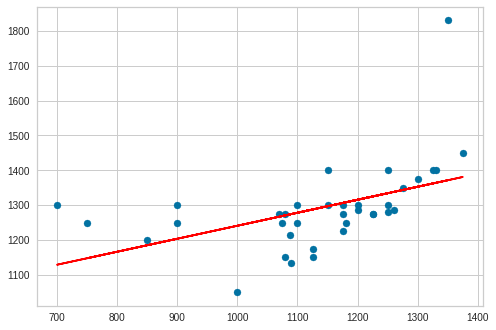

In [ ]:
#Geração do grafico com os pontos reais e as previsoes
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red') 

In [ ]:
#valor anual da franquina
valr =  1300
modelo.predict([[valr]])

array([1352.70953897])